In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as sts
from matplotlib import pyplot as plt

In [30]:
wine_data = pd.read_csv('Resources/Wine Production By Country.csv', delimiter=';')
big_df = pd.read_csv('../nadia/merged_with_wine_final_df.csv')

In [16]:
wine_data.head()

,Country,wine_unit,Year
0,France,4293466,2013
1,Italy,4107370,2013
2,United States,3217000,2013
3,Spain,3200000,2013
4,Chile,1832000,2013


In [31]:
big_df.head()

,Unnamed: 0,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Main Industry,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Wine Consumption per capita (Liters)
0,0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,small-scale production of bricks,South Asia,2.5669,52.590000,7.462861,17.553463,0.00
1,1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610,1.14
2,2,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,14.700388,0.22
3,3,Europe,AZE,Azerbaijan,0.8,"dry, semiarid steppe",petroleum and natural gas,Commonwealth of Independent States,5.1648,65.508400,9.687727,10.495815,0.23
4,4,South America,ARG,Argentina,9.8,mostly temperate; arid in southeast; subantarc...,food processing,Latin America and Caribbean,5.9747,68.803802,9.810955,15.491235,3.22


In [19]:

continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

wine_percent_of_all_alc = [2.32291254,
                           2.49273256,
                           25.6886354,
                           3.29942784,
                           15.43529412,
                           12.5407692]

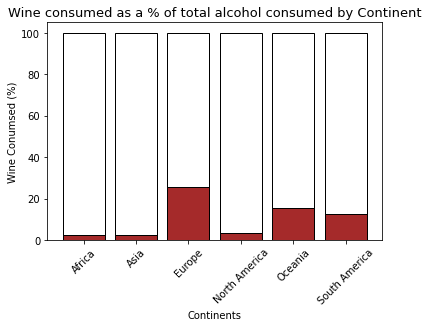

In [40]:
plt.bar(continents, [100 for i,_ in enumerate(continents)], edgecolor='black', fill=False)
plt.bar(continents, wine_percent_of_all_alc, edgecolor='black', color='brown')

plt.title('Wine consumed as a % of total alcohol consumed by Continent', fontsize=13)
plt.xlabel('Continents')
plt.xticks(rotation=45)
plt.ylabel('Wine Conumsed (%)');

In [45]:
numerical_data = big_df.select_dtypes(['float', 'int']).drop('Unnamed: 0', axis=1)
numerical_data.head()

,Alcohol Consumption Per Capita (Liters),Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Wine Consumption per capita (Liters)
0,0.2,2.5669,52.590000,7.462861,17.553463,0.00
1,7.5,4.8827,68.708138,9.417931,10.987610,1.14
2,0.9,5.0051,65.905174,9.537965,14.700388,0.22
3,0.8,5.1648,65.508400,9.687727,10.495815,0.23
4,9.8,5.9747,68.803802,9.810955,15.491235,3.22


In [48]:
import itertools as it

In [83]:
def getFeatureCombos(df):
    combinations_of_features = list(it.combinations(df.columns, 2))
    feature_combos = [big_df[list(combinations_of_features[i])] for i,_ in enumerate(combinations_of_features) if 'Alcohol' in combinations_of_features[i][0]]
    return feature_combos

In [91]:
features = getFeatureCombos(numerical_data)

In [92]:
def getRValues(feature_combos):
    print('All values comes from a range of [-1,1], 1 is a closer coorelation')
    print('Pearson r assumes linear, Spearman r assumes monotonic behavior', '\n')

    for feature_pair in feature_combos:
        x = feature_pair.iloc[:, 0]
        y = feature_pair.iloc[:, 1]

        pear = sts.pearsonr(x, y)[0]
        spear = sts.spearmanr(x, y)[0]

        print(f'{feature_pair.columns[0]} v. {feature_pair.columns[1]}')
        print(f'pearsonr: {pear}')
        print(f'spearnmanr: {spear}', '\n')

In [93]:
getRValues(features)

All values comes from a range of [-1,1], 1 is a closer coorelation
Pearson r assumes linear, Spearman r assumes monotonic behavior 

Alcohol Consumption Per Capita (Liters) v. Happiness Score
pearsonr: 0.42563347477985314
spearnmanr: 0.4261597084323469 

Alcohol Consumption Per Capita (Liters) v. Life Expectancy
pearsonr: 0.3964639780609517
spearnmanr: 0.4546147408305744 

Alcohol Consumption Per Capita (Liters) v. GDP per capita
pearsonr: 0.45284948771660327
spearnmanr: 0.47395011945085663 

Alcohol Consumption Per Capita (Liters) v. Mental Health Disorders (%)
pearsonr: 0.08788566934509072
spearnmanr: 0.0759093435005078 

Alcohol Consumption Per Capita (Liters) v. Wine Consumption per capita (Liters)
pearsonr: 0.6606115831743264
spearnmanr: 0.7106643656135174 

